<style>
    .marquee-wrapper{
  /* background:#2F394C; */
  text-align:center;
}
.marquee-wrapper .container{
  overflow:hidden;
}
.marquee-inner span{
  float:left;
  width:50%;
}
.marquee-wrapper .marquee-block{
  --total-marquee-items:5;
  height: 200px;
  width: calc(250px * (var(--total-marquee-items)));
  overflow: hidden;
  box-sizing: border-box;
  position: relative;
  margin: 10px auto;
  /* background:#1B2531; */
  padding: 30px 0;
}
.marquee-inner{
  display: block;
  width: 200%;
  position: absolute;
}
.marquee-inner p{
  font-weight: 800;
  font-size: 30px;
  font-family: cursive;
}
.marquee-inner.to-left{
  animation: marqueeLeft 25s linear infinite;
}
.marquee-inner.to-right{
  animation: marqueeRight 25s linear infinite;
}
.marquee-item{
  width: 230px;
  height: auto;
  display: inline-block;
  margin: 0 10px;
  float: left;
  transition: all .2s ease-out;
  /* background:#00cc00; */
}
@keyframes marqueeLeft{
  0% {
    left: 0;
  }
  100% {
    left: -100%;
  }
}
@keyframes marqueeRight{
  0% { 
    left: -100%; 
  }
  100% {
   left: 0; 
  }
}
</style>
<div class="marquee-wrapper">
	<div class="container">
		<div class="marquee-block">
			<div class="marquee-inner to-left">
				<span>
					<div class="marquee-item">
            <img src="bulba.png">
					</div>
					<div class="marquee-item">
						<img src="legendary.png">
					</div>
					<div class="marquee-item">
						<img src="lugia.jpeg">
					</div>
					<div class="marquee-item">
						<img src="wall.jpg">
					</div>
					<div class="marquee-item">
						<img src="zapdos.jpg">
					</div>
				</span>
				<span>
					<div class="marquee-item">
            <img src="bulba.png">
					</div>
					<div class="marquee-item">
						<img src="legendary.png">
					</div>
					<div class="marquee-item">
						<img src="lugia.jpeg">
					</div>
					<div class="marquee-item">
						<img src="wall.jpg">
					</div>
					<div class="marquee-item">
						<img src="zapdos.jpg">
					</div>
				</span>
			</div>
		</div>
	</div>
</div>  


<h1 class="center"><strong>Pokemon Classification (Legendary or not)</strong></h1>

<h3>Importing the dataset</h3>

In [204]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('pokemon.csv')
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


<h3>Pie chart showing imbalance in classes</h3>

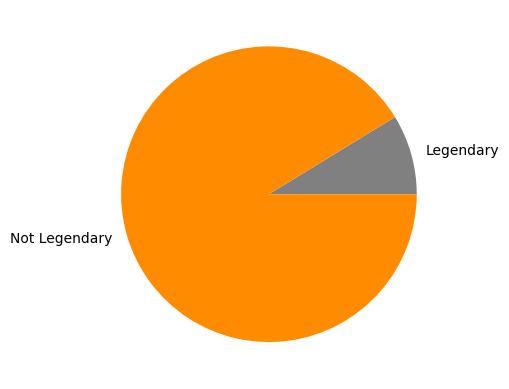

In [205]:
plt.pie([data[data['is_legendary']==1].shape[0],data[data['is_legendary']==0].shape[0]],labels=['Legendary','Not Legendary'],colors=['gray','darkorange'])
plt.show()

<h3>Checking for NaN values</h3>

In [206]:
data.isna().any()
row_nan_count = data.isna().sum(axis=0)
row_nan_count[row_nan_count!=0]

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64

<h3>Extracting records with missing weights and height</h3>

In [207]:
missing_rows = data[data['weight_kg'].isna()| data['height_m'].isna()]
missing_rows

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
18,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,19,25,35,72,normal,dark,NaN,1,0
19,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,20,40,80,77,normal,dark,NaN,1,0
25,"['Static', 'Lightningrod', 'Surge Surfer']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,...,50.0,26,95,85,110,electric,electric,NaN,1,0
26,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,27,10,35,40,ground,ice,NaN,1,0
27,"['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,28,25,65,65,ground,ice,NaN,1,0
36,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,24.6,37,50,65,65,fire,ice,NaN,1,0
37,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,24.6,38,81,100,109,fire,ice,NaN,1,0
49,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,50,35,45,90,ground,ground,NaN,1,0
50,"['Sand Veil', 'Arena Trap', 'Sand Force', 'San...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,50.0,51,50,70,110,ground,ground,NaN,1,0
51,"['Pickup', 'Technician', 'Unnerve', 'Pickup', ...",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,50.0,52,50,40,90,normal,dark,NaN,1,0


<table>
    <tr>
        <td>No. of records with missing height & weight
        </td>
        <td>20
        </td>
    </tr>
    <tr>
        <td>No. of records with missing height
        </td>
        <td>20
        </td>
    </tr>
    <tr>
        <td>No. of records with missing weight
        </td>
        <td>20
        </td>
    </tr>
</table>
<br/>
Hence, pokemon whose heights are missing their weights are also missing.<br/>

Now, listing their names:

In [208]:
missing_rows['name']

18       Rattata
19      Raticate
25        Raichu
26     Sandshrew
27     Sandslash
36        Vulpix
37     Ninetales
49       Diglett
50       Dugtrio
51        Meowth
52       Persian
73       Geodude
74      Graveler
75         Golem
87        Grimer
88           Muk
102    Exeggutor
104      Marowak
719        Hoopa
744     Lycanroc
Name: name, dtype: object

<h3>Fetching the heights and weights from serebii.net</h3>

In [209]:
height=[0.3,0.7,0.7,0.65,1.1,0.6,1.1,0.2,0.7,0.4,1.1,0.4,1,1.6,0.8,1.1,6.45,1,3.5,1]
weight=[3.7,20,25,26,40,9.9,19.9,0.9,50,4.2,32,20,107,308,36,41,267.8,39.5,250,25]

missing_rows.loc[:,'weight_kg']=weight
missing_rows.loc[:,'height_m']=height
data.loc[missing_rows.index,'height_m']=missing_rows['height_m']
data.loc[missing_rows.index,'weight_kg']=missing_rows['weight_kg']
data.loc[missing_rows.index,['height_m','weight_kg']]

data.isna().any()
row_nan_count = data.isna().sum(axis=0)
row_nan_count[row_nan_count!=0]

percentage_male     98
type2              384
dtype: int64

<strong><h2>Feature Selection</h2></strong>

<h3>Listing all features</h3>

In [210]:
data.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

<h3>Manually dropping columns on which classification does not depend</h3>

In [211]:
data=data.drop(['classfication','type1','type2','name','japanese_name','abilities','percentage_male','pokedex_number'],axis=1)

<h3>Checking For Correlation</h3>

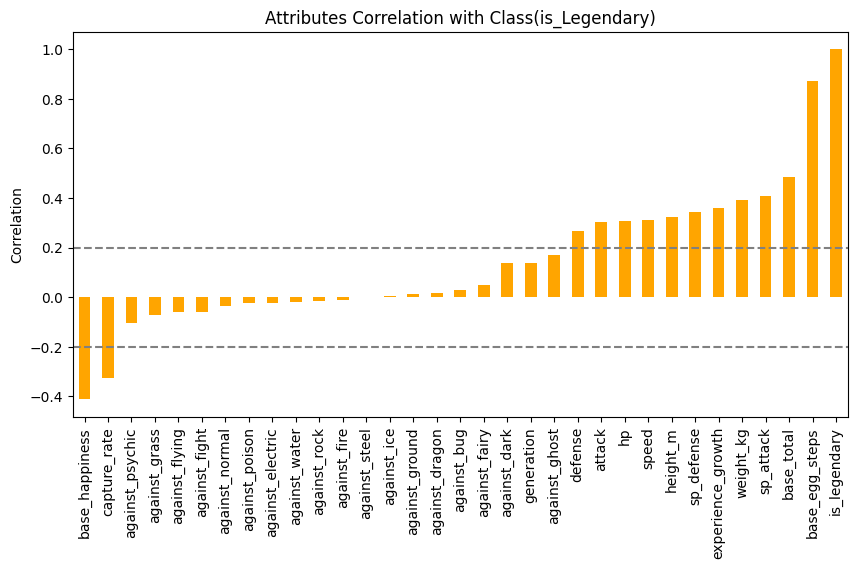

In [212]:
data.corr()['is_legendary'].sort_values().plot(kind='bar',color = 'orange',figsize=(10,5))
plt.title('Attributes Correlation with Class(is_Legendary)')
plt.axhline(-0.2,c='gray',linestyle='--')
plt.axhline(0.2,c='gray',linestyle='--')
plt.ylabel('Correlation')
plt.show()

<h3>Plot showing mutual information value of each attribute</h3>
<p>Greater value -> more important feature</p>

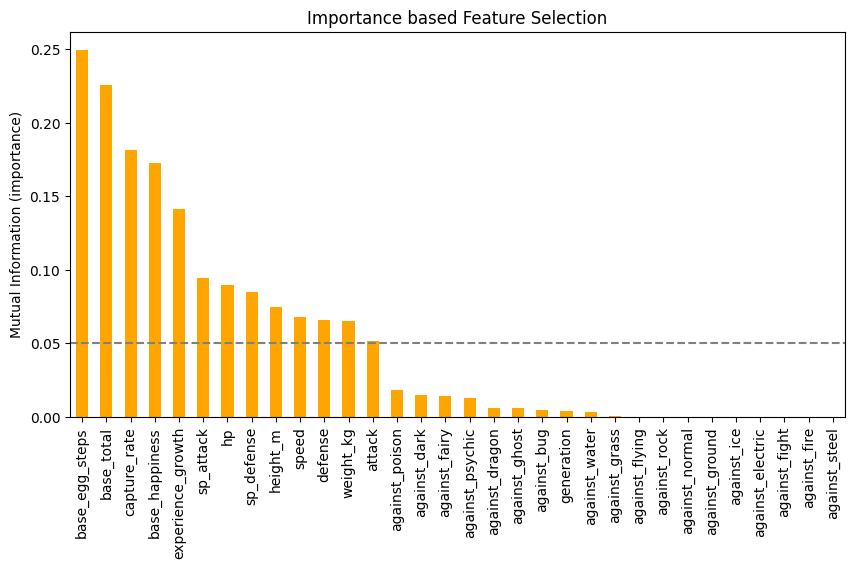

In [213]:
from sklearn.feature_selection import mutual_info_classif


y=data['is_legendary']
x=data.drop('is_legendary',axis=1)


importances=mutual_info_classif(x,y)
feature_imp=pd.Series(importances,x.columns)
feature_imp.sort_values(ascending=False,axis=0).plot(kind='bar',color='orange',figsize=(10,5))
plt.axhline(0.05,c='gray',linestyle='--')
plt.title('Importance based Feature Selection')
plt.ylabel('Mutual Information (importance)')
plt.show()

<h3>Dropping features with mutual importance value less than 0.05</h3>

In [214]:
to_drop=[i for i in x.columns if feature_imp[i]<0.05]
data.drop(to_drop,axis=1,inplace=True)
data

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,sp_attack,sp_defense,speed,weight_kg,is_legendary
0,49,5120,70,318,45,49,1059860,0.7,45,65,65,45,6.9,0
1,62,5120,70,405,45,63,1059860,1.0,60,80,80,60,13.0,0
2,100,5120,70,625,45,123,1059860,2.0,80,122,120,80,100.0,0
3,52,5120,70,309,45,43,1059860,0.6,39,60,50,65,8.5,0
4,64,5120,70,405,45,58,1059860,1.1,58,80,65,80,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,101,30720,0,570,25,103,1250000,9.2,97,107,101,61,999.9,1
797,181,30720,0,570,255,131,1250000,0.3,59,59,31,109,0.1,1
798,101,30720,0,570,15,53,1250000,5.5,223,97,53,43,888.0,1
799,107,30720,0,600,3,101,1250000,2.4,97,127,89,79,230.0,1


<h3>Splitting columns in Attributes(X) and Class(Y)</h3>

In [215]:
y=data['is_legendary']
x=data.drop('is_legendary',axis=1)
x

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,sp_attack,sp_defense,speed,weight_kg
0,49,5120,70,318,45,49,1059860,0.7,45,65,65,45,6.9
1,62,5120,70,405,45,63,1059860,1.0,60,80,80,60,13.0
2,100,5120,70,625,45,123,1059860,2.0,80,122,120,80,100.0
3,52,5120,70,309,45,43,1059860,0.6,39,60,50,65,8.5
4,64,5120,70,405,45,58,1059860,1.1,58,80,65,80,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,101,30720,0,570,25,103,1250000,9.2,97,107,101,61,999.9
797,181,30720,0,570,255,131,1250000,0.3,59,59,31,109,0.1
798,101,30720,0,570,15,53,1250000,5.5,223,97,53,43,888.0
799,107,30720,0,600,3,101,1250000,2.4,97,127,89,79,230.0


<h3>Splitting Data into training and testing data<br/>
Using <strong>stratify</strong> to maintain same ratio of each class in training and testing sets</h3>

In [216]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69,stratify=y)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (640, 13)
x_test shape: (161, 13)
y_train shape: (640,)
y_test shape: (161,)


<h3>Gaussian Naive Bayes Classification</h3>

In [217]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Training Confusion Matrix : ")
print(confusion_matrix(y_train, model.predict(x_train)))
print("Testing Confusion Matrix : ")
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print()

Training Confusion Matrix : 
[[564  20]
 [  4  52]]
Testing Confusion Matrix : 
[[142   5]
 [  0  14]]
Accuracy: 0.968944099378882
Precision: 0.7368421052631579
Recall: 1.0
F1 Score: 0.8484848484848485



<h3>Decision Tree Classifier on basis of entropy</h3>

In [218]:
from sklearn import tree
t_model=tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
t_model.fit(x_train,y_train)
print("Tree depth : ",t_model.tree_.max_depth)

Tree depth :  3


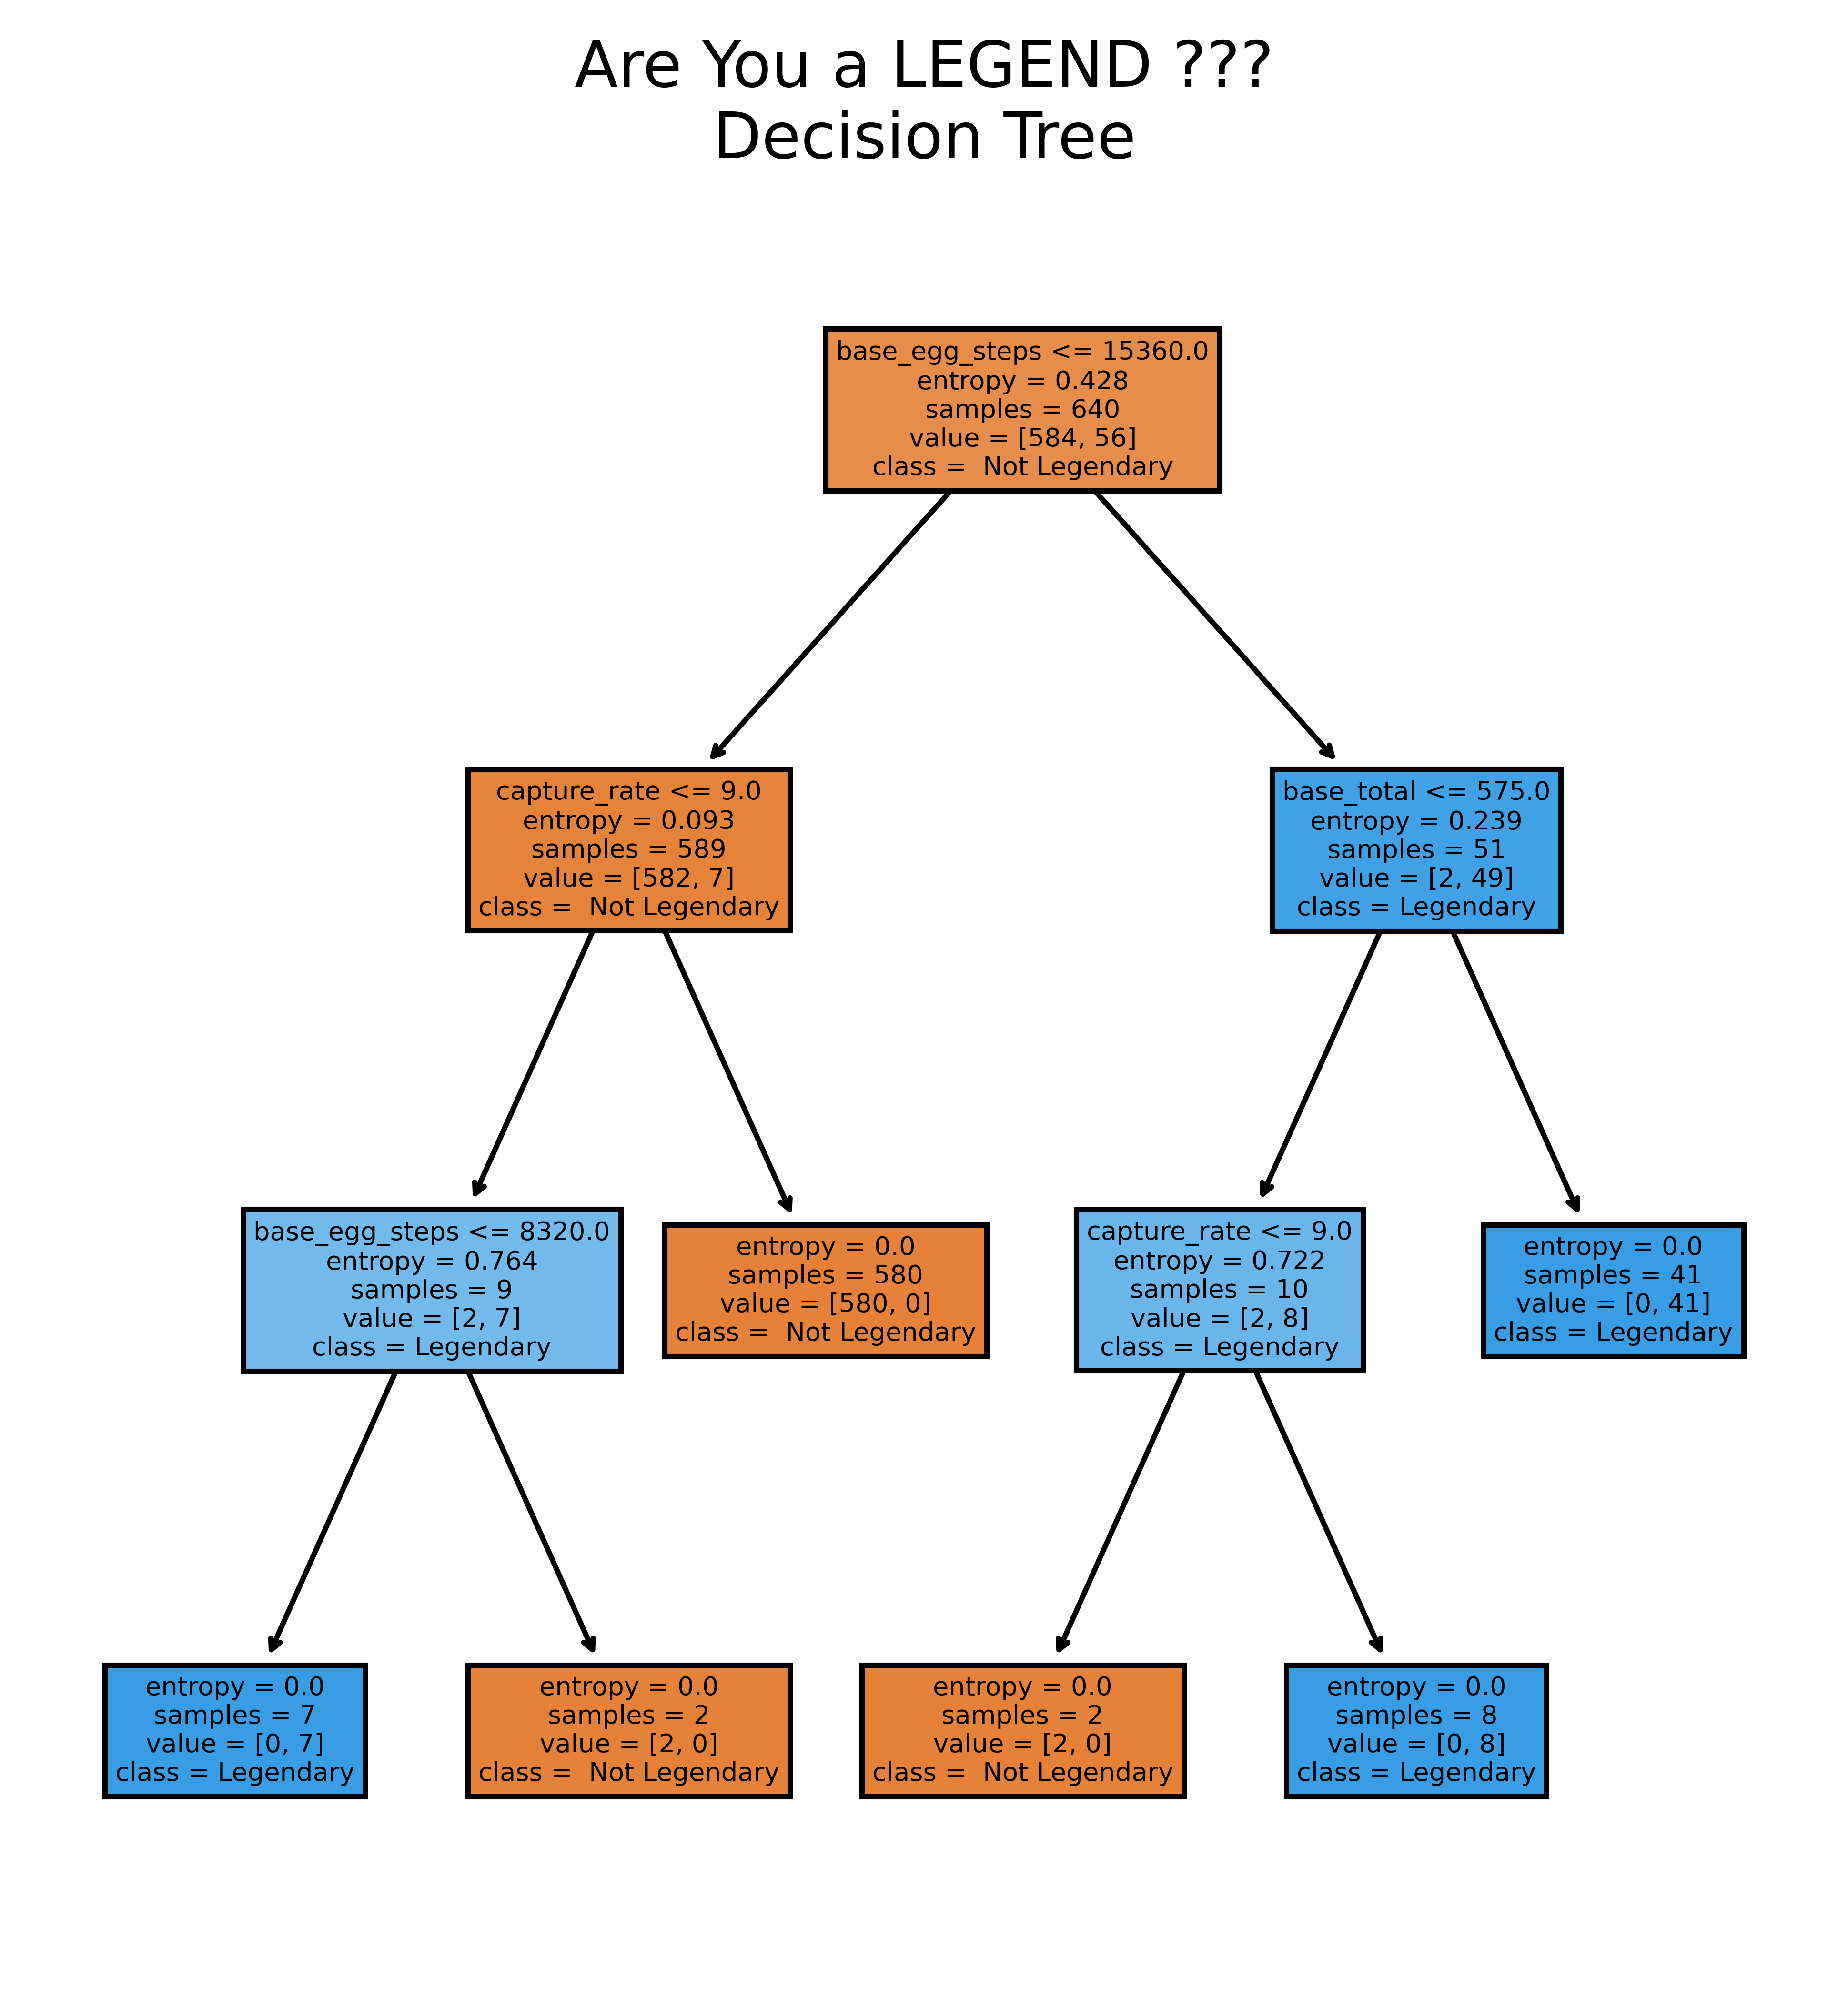

In [219]:
fig,axes = plt.subplots(nrows= 1, ncols= 1, figsize = (6,6) , dpi = 800)
tree.plot_tree(t_model,feature_names= x.columns,class_names= [' Not Legendary','Legendary'],filled= True)
plt.title("Are You a LEGEND ???\nDecision Tree")
plt.show()

<h3>For single object Decision Tree prediction</h3>

In [220]:
egg=640*5
happiness=50
capture_rate=10
base_total=450

x_input=[0,egg,happiness,base_total,capture_rate,0,0,0,0,0,0,0,0]
if t_model.predict([x_input])==0:
    print("Not Legendary")
else:
    print("legendary!")

Not Legendary


/home/ayush/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [221]:


y_pred = t_model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Training Confusion Matrix : ")
print(confusion_matrix(y_train, t_model.predict(x_train)),end='\n\n')
# Assuming you have the predicted labels in y_pred and true labels in y_true
print("Testing Confusion Matrix : ")
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Print the Testing metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print()

Training Confusion Matrix : 
[[584   0]
 [  0  56]]

Testing Confusion Matrix : 
[[147   0]
 [  0  14]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



<h3>Standardizing Data for Logistic Regression</h3>

In [222]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,sp_attack,sp_defense,speed,weight_kg
0,-0.897909,-0.315986,0.236791,-0.926533,-0.704390,-0.780773,0.030371,-0.427648,-0.902083,-0.195025,-0.211687,-0.738486,-0.501534
1,-0.493413,-0.315986,0.236791,-0.196233,-0.704390,-0.325488,0.030371,-0.151920,-0.337312,0.268888,0.325465,-0.219268,-0.445502
2,0.688960,-0.315986,0.236791,1.650503,-0.704390,1.625735,0.030371,0.767173,0.415717,1.567846,1.757871,0.473022,0.353632
3,-0.804564,-0.315986,0.236791,-1.002081,-0.704390,-0.975896,0.030371,-0.519557,-1.127992,-0.349663,-0.748839,-0.046196,-0.486837
4,-0.431183,-0.315986,0.236791,-0.196233,-0.704390,-0.488090,0.030371,-0.060011,-0.412614,0.268888,-0.211687,0.473022,-0.390390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.720076,3.589951,-3.337061,1.188819,-0.966853,0.975327,1.217590,7.384641,1.055791,1.103932,1.077478,-0.184654,8.619618
797,3.209283,3.589951,-3.337061,1.188819,2.051470,1.885898,1.217590,-0.795285,-0.374963,-0.380590,-1.429231,1.476843,-0.563995
798,0.720076,3.589951,-3.337061,1.188819,-1.098084,-0.650692,1.217590,3.983998,5.799871,0.794657,-0.641408,-0.807715,7.591766
799,0.906766,3.589951,-3.337061,1.440646,-1.255562,0.910286,1.217590,1.134810,1.055791,1.722483,0.647757,0.438407,1.547740


<h3>Using Stratified K-fold Cross Validation for Logistic Regression</h3>

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression()
dic={}
skf=StratifiedKFold(10,shuffle=True,random_state=69)
for i, (train_index, test_index) in enumerate(skf.split(x, y)):
    x_train,y_train = x.iloc[train_index],y.iloc[train_index]
    x_test,y_test = x.loc[test_index],y.iloc[test_index]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    dic[i] =[accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),
             recall_score(y_test, y_pred),f1_score(y_test, y_pred),
             confusion_matrix(y_test, y_pred),accuracy_score(y_train,train_pred),
             precision_score(y_train,train_pred),recall_score(y_train,train_pred),
             f1_score(y_train,train_pred),confusion_matrix(y_train,train_pred)]

kfoldstats = pd.DataFrame(dic,index=['testAccuracy','testPrecision','testRecall','testF1','testCM','trainAccuracy','trainPrecision','trainRecall','trainF1','trainCM']).T
kfoldstats.head()
# dic


,testAccuracy,testPrecision,testRecall,testF1,testCM,trainAccuracy,trainPrecision,trainRecall,trainF1,trainCM
0,0.975309,1.0,0.714286,0.833333,"[[74, 0], [2, 5]]",0.9875,0.95,0.904762,0.926829,"[[654, 3], [6, 57]]"
1,0.9625,0.833333,0.714286,0.769231,"[[72, 1], [2, 5]]",0.987517,0.965517,0.888889,0.92562,"[[656, 2], [7, 56]]"
2,0.9875,1.0,0.857143,0.923077,"[[73, 0], [1, 6]]",0.987517,0.95,0.904762,0.926829,"[[655, 3], [6, 57]]"
3,1.0,1.0,1.0,1.0,"[[73, 0], [0, 7]]",0.984743,0.948276,0.873016,0.909091,"[[655, 3], [8, 55]]"
4,0.975,0.777778,1.0,0.875,"[[71, 2], [0, 7]]",0.988904,0.982456,0.888889,0.933333,"[[657, 1], [7, 56]]"


<h3>Plotting Training Metrics</h3>

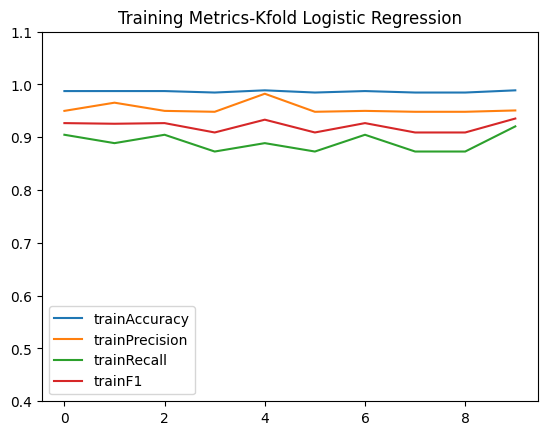

In [224]:
kfoldstats.iloc[:,5:-1].plot()
plt.title('Training Metrics-Kfold Logistic Regression')
plt.ylim(0.4,1.1)
plt.show()

<h3>Plotting Testing Metrics</h3>

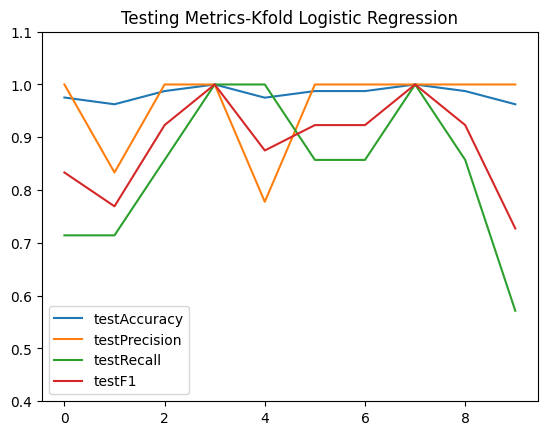

In [225]:
kfoldstats.iloc[:,:4].plot()
plt.ylim(0.4,1.1)
plt.title('Testing Metrics-Kfold Logistic Regression')
plt.show()